# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [3]:
data.shape

(400, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [8]:
data.Sales.values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

# Converting sales data to categorical data

In [9]:
data['Sales']=pd.cut(np.array([9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,  4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,
        6.44,  5.17,  6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,
        9.09,  8.77,  3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,
        5.93,  6.89,  7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,
        3.63,  5.68,  8.22,  0.37,  6.71,  6.71,  7.3 , 11.48,  8.01,
       12.49,  9.03,  6.38,  0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,
        4.94,  7.43,  4.74,  5.32,  9.95, 10.07,  8.68,  6.03,  8.07,
       12.11,  8.79,  6.67,  7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,
        3.62,  6.42,  5.56,  5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,
        8.19,  7.78,  3.02,  4.36,  9.39, 12.04,  8.23,  4.83,  2.34,
        5.73,  4.34,  9.7 , 10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,
        6.68,  7.8 ,  8.69,  5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,
        9.43,  5.53,  9.32,  9.62,  7.36,  3.89, 10.31, 12.01,  4.68,
        7.82,  8.78, 10.  ,  6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,
        8.31,  5.64,  9.58,  7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,
        5.71,  6.37,  7.77,  6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01,
       11.99,  4.55, 12.98, 10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,
        3.42,  2.86, 11.19,  7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,
        6.98,  8.75,  9.49,  6.64, 11.82, 11.28, 12.66,  4.21,  8.21,
        3.07, 10.98,  9.4 ,  8.57,  7.41,  5.28, 10.01, 11.93,  8.03,
        4.78,  5.9 ,  9.24, 11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,
        6.39, 15.63,  6.41, 10.08,  6.97,  5.86,  7.52,  9.16, 10.36,
        2.66, 11.7 ,  4.69,  6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,
        5.87,  7.63,  6.18,  5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,
        7.81,  5.99,  8.43,  4.81,  8.97,  6.88, 12.57,  9.32,  8.64,
       10.44, 13.44,  9.45,  5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,
        8.77,  8.68,  5.25, 10.26, 10.5 ,  6.53,  5.98, 14.37, 10.71,
       10.26,  7.68,  9.08,  7.8 ,  5.58,  9.44,  7.9 , 16.27,  6.81,
        6.11,  5.81,  9.64,  3.9 ,  4.95,  9.35, 12.85,  5.87,  5.32,
        8.67,  8.14,  8.44,  5.47,  6.1 ,  4.53,  5.57,  5.35, 12.57,
        6.14,  7.41,  5.94,  9.71]),3,labels=["Low","Medium","High"])

In [10]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


# Encoding the categorical Variable

In [11]:
LB=preprocessing.LabelEncoder()
data['Sales']=LB.fit_transform(data['Sales'])
data['ShelveLoc']=LB.fit_transform(data['ShelveLoc'])
data['Urban']=LB.fit_transform(data['Urban'])
data['US']=LB.fit_transform(data['US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,2,100,79,7,284,95,0,50,12,1,1


In [12]:
# Splitting the data into indendent and dependent variable

x=data.drop(['Sales'],axis=1)
y=data['Sales']

In [13]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [14]:
y

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales, Length: 400, dtype: int32

In [15]:
data['Sales'].unique()

array([2, 0, 1])

In [16]:
data.Sales.value_counts()

Sales
2    247
1    102
0     51
Name: count, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


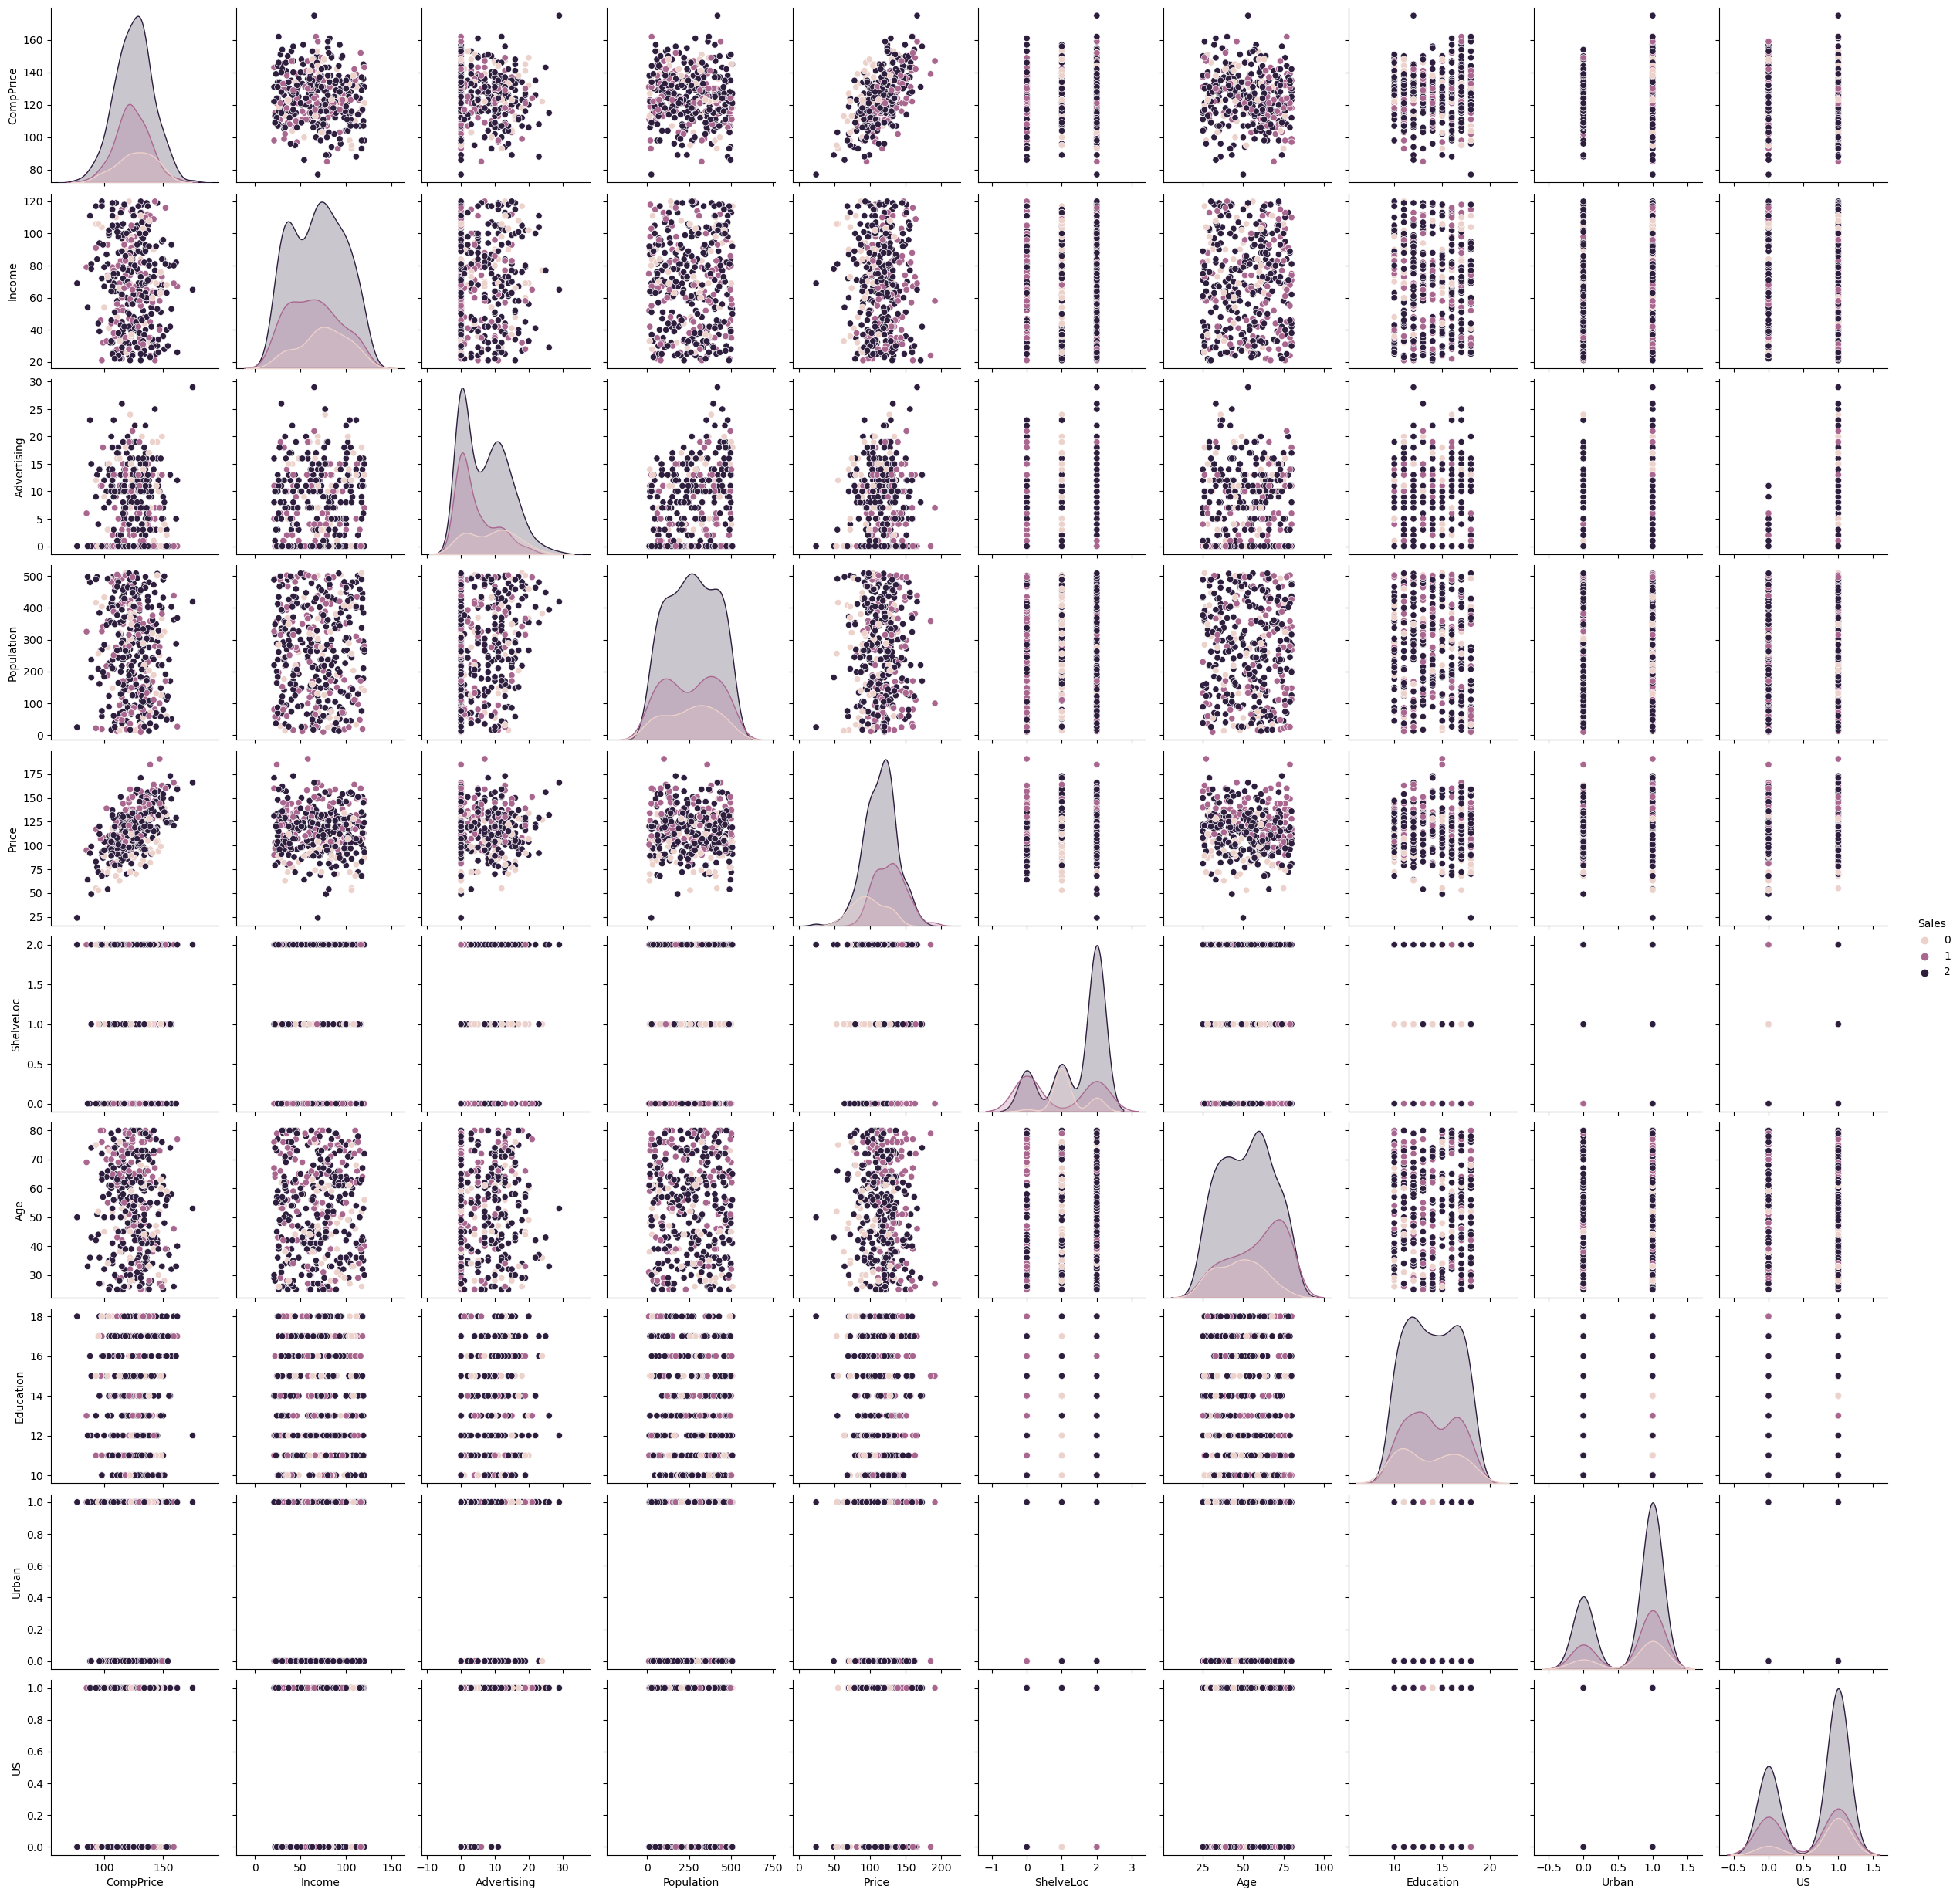

In [17]:
sns.pairplot(data=data, hue = 'Sales')

In [36]:
# Converting into array

X=x.values
Y=y.values

In [37]:
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [38]:
Y

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2,

In [39]:
# Splitting data into training and testing data set

x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=15)

# Model

In [40]:
models=[DecisionTreeClassifier(),
        BaggingClassifier(n_estimators=200,max_samples=0.8),
       RandomForestClassifier(n_estimators=200,max_samples=0.8,max_features=5),
       ]

In [41]:
for model in models:
    model.fit (x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print("===="*50)
    print(classification_report(y_test,pred))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.81      0.52      0.63        25
           2       0.69      0.88      0.77        42

    accuracy                           0.70        80
   macro avg       0.70      0.62      0.64        80
weighted avg       0.71      0.70      0.69        80

BaggingClassifier(max_samples=0.8, n_estimators=200)
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.82      0.36      0.50        25
           2       0.61      0.95      0.74        42

    accuracy                           0.65        80
   macro avg       0.81      0.51      0.54        80
weighted avg       0.74      0.65      0.61        80

RandomForestClassifier(max_features=5, max_samples=0.8, n_estimators=200)
              precision    recall  f1-score   support

           0       1.00      0.